In [ ]:
!pip install pandas matplotlib seaborn plotly
!pip install pystan==3.7.0
!pip install prophet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

In [ ]:
data = pd.read_csv("drive/MyDrive/Data Analyst/Project/Analisis Shopee/sample_data.csv")

data = data.rename(columns={'w_date': 'date'})
data['date'] = pd.to_datetime(data['date'])

##Eda

In [ ]:
#Cek Struktur Data
data.info()
data.describe()
data.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20312 entries, 0 to 20311
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   price_ori             20112 non-null  float64       
 1   delivery              6558 non-null   object        
 2   item_category_detail  20312 non-null  object        
 3   specification         20301 non-null  object        
 4   title                 20312 non-null  object        
 5   date                  20312 non-null  datetime64[ns]
 6   link_ori              20312 non-null  object        
 7   item_rating           20301 non-null  object        
 8   seller_name           20301 non-null  object        
 9   idElastic             20312 non-null  object        
 10  price_actual          20297 non-null  float64       
 11  sitename              20312 non-null  object        
 12  idHash                20312 non-null  object        
 13  total_rating    

,0
price_ori,2964
delivery,1
item_category_detail,1152
specification,19264
title,16430
date,20
link_ori,16614
item_rating,23
seller_name,9226
idElastic,20312


In [ ]:
print(f"Tanggal awal: {data['date'].min()}, Tanggal akhir: {data['date'].max()}")

Tanggal awal: 2023-04-24 00:00:00, Tanggal akhir: 2023-05-13 00:00:00


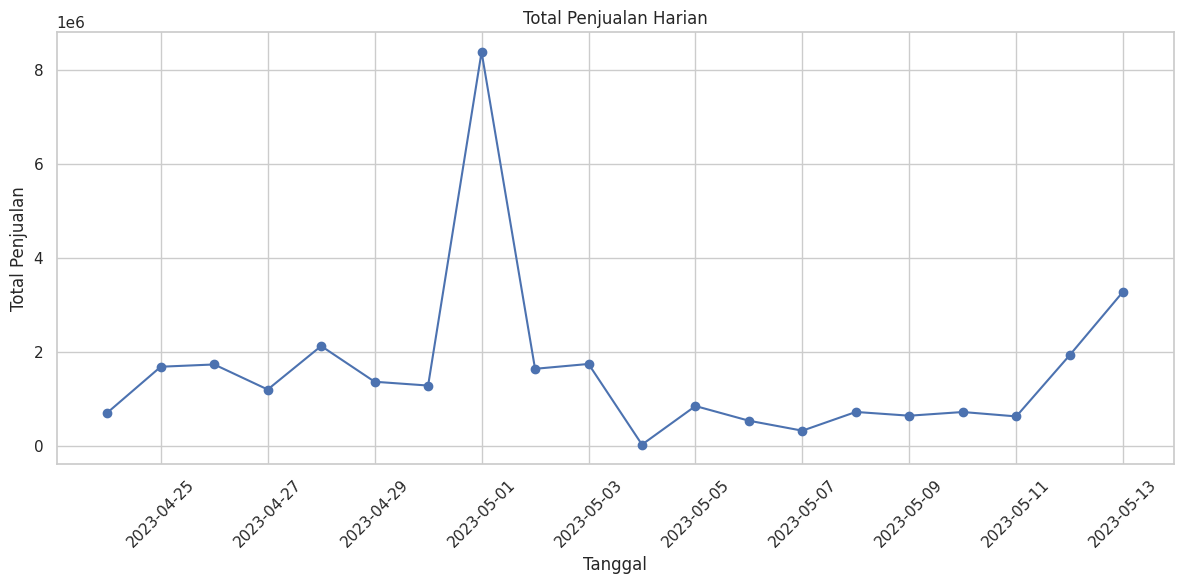

In [ ]:
def convert_sold(value):
    if isinstance(value, str):
        value = value.lower().replace(",", "").strip()
        if "k" in value:
            return float(value.replace("k", "")) * 1000
        try:
            return float(value)
        except:
            return 0
    return value

data['total_sold'] = data['total_sold'].apply(convert_sold)

daily_sales = data.groupby('date')['total_sold'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales['date'], daily_sales['total_sold'], marker='o')
plt.title('Total Penjualan Harian')
plt.xlabel('Tanggal')
plt.ylabel('Total Penjualan')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Gunakan data total quantity terjual per hari
daily_sales = data.groupby('date')['total_sold'].sum().reset_index()

# Rename agar cocok dengan Prophet
daily_sales = daily_sales.rename(columns={
    'date': 'ds',
    'total_sold': 'y'
})

daily_sales.head()


,ds,y
0,2023-04-24,715443.0
1,2023-04-25,1692729.0
2,2023-04-26,1740908.0
3,2023-04-27,1208232.0
4,2023-04-28,2132748.0


In [ ]:
import plotly.express as px

fig = px.line(daily_sales, x='ds', y='y', title='Permintaan Harian Produk Fashion')
fig.show()


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwwaz3w5k/od599_is.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwwaz3w5k/ike_vxhv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51440', 'data', 'file=/tmp/tmpwwaz3w5k/od599_is.json', 'init=/tmp/tmpwwaz3w5k/ike_vxhv.json', 'output', 'file=/tmp/tmpwwaz3w5k/prophet_model485s863s/prophet_model-20250724120213.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:02:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:02:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:

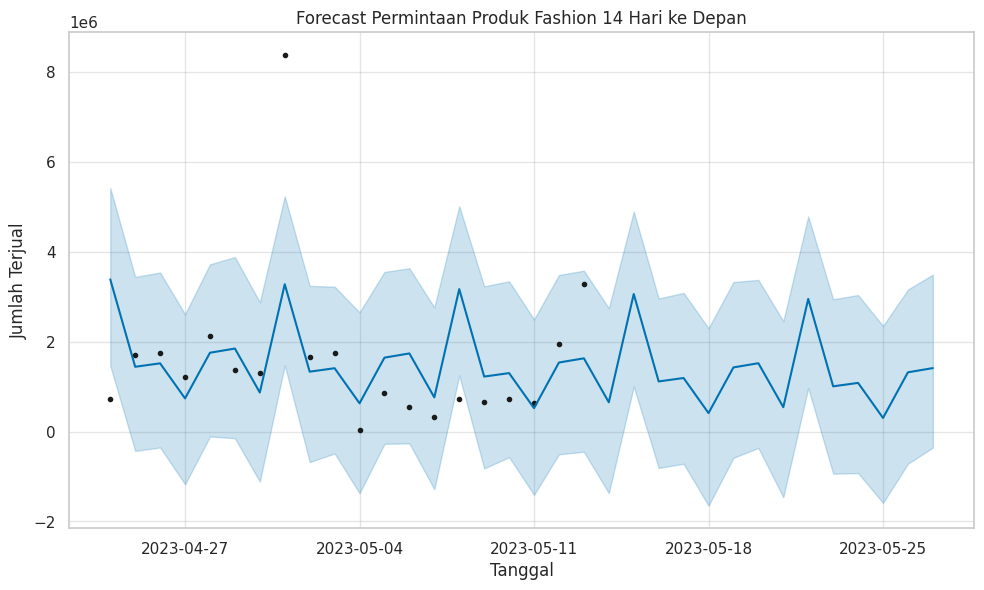

,ds,yhat,yhat_lower,yhat_upper
14,2023-05-08,3.167043e+06,1.249118e+06,5.013969e+06
15,2023-05-09,1.222304e+06,-8.217397e+05,3.229751e+06
16,2023-05-10,1.298746e+06,-5.712410e+05,3.340217e+06
17,2023-05-11,5.189172e+05,-1.409665e+06,2.491866e+06
18,2023-05-12,1.534386e+06,-5.071422e+05,3.481400e+06
19,2023-05-13,1.627734e+06,-4.504664e+05,3.577561e+06
20,2023-05-14,6.499577e+05,-1.371413e+06,2.743283e+06
21,2023-05-15,3.058316e+06,9.997869e+05,4.890902e+06
22,2023-05-16,1.113577e+06,-8.108813e+05,2.959855e+06
23,2023-05-17,1.190020e+06,-7.187773e+05,3.082469e+06


In [ ]:
from prophet import Prophet

# Inisialisasi model
model = Prophet()

# Fit model ke data historis
model.fit(daily_sales)

# Buat dataframe tanggal prediksi ke depan (misal 14 hari)
future = model.make_future_dataframe(periods=14)

# Prediksi
forecast = model.predict(future)

# Plot hasil prediksi
fig = model.plot(forecast)
plt.title("Forecast Permintaan Produk Fashion 14 Hari ke Depan")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Terjual")
plt.show()

# Tampilkan 5 baris pertama hasil forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(20)

Garis biru = prediksi rata-rata permintaan per hari

Area biru = interval kepercayaan 95% (semakin lebar = semakin tidak pasti)

Titik hitam = data historis

Pola zigzag = ada seasonality harian atau mingguan

Nilai prediksi stabil di kisaran 1–2 juta unit per hari

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('forecast_fashion.csv', index=False)